In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#This script analyzes one session of playing roundnet from data extracted from Polar Flow

#Define path 
path =   r'C:\Users\Käyttäjä\DataProjects\DataProjects\Roundnet\spiketreeni2.json'

#Open file
f = open(path)
data = json.load(f)

In [3]:
#Add subject and session information to a table
tiedotdata = data['physicalInformationSnapshot']
tiedot = pd.DataFrame.from_dict(tiedotdata, orient='index')
tiedot = tiedot.drop('sleepGoal')
tiedot = tiedot.drop('functionalThresholdPower')
print(tiedot)
print("")

                                              0
dateTime                2023-07-10T02:14:04.000
sex                                        MALE
birthday                             1996-11-08
height, cm                                175.0
weight, kg                                 81.0
vo2Max                                       48
maximumHeartRate                            195
restingHeartRate                             60
aerobicThreshold                            146
anaerobicThreshold                          175
speedCalibrationOffset                  1.03534



In [4]:
#Extract aerobic and anaerobic tresholds
aerk = tiedot.loc['aerobicThreshold'][0]
anak = tiedot.loc['anaerobicThreshold'][0]

#Create variables for calculating time above aerobic and anaerobic tresholds
countAerk = 0
countAnak = 0
heartRates = []
times = []
#Loop through datafile, extract heart rates and times, count time above aerobic and anaerobic tresholds
for exercise in data['exercises']:
    heartRate = exercise['samples']['heartRate']
    for sample in heartRate:
        if 'value' in sample:
            heartRates.append(sample['value'])
            time = sample['dateTime']
            time = datetime.fromisoformat(time)
            times.append(time)
            if sample['value'] >= aerk:
                countAerk += 1
            if sample['value'] >= anak:
                countAnak += 1
    timeAboveAerk = round(countAerk / len(heartRate) * 100, 1)
    timeAboveAnak = round(countAnak / len(heartRate) * 100, 1)

# Calculate average heart rate
average_heart_rate = sum(heartRates) / len(heartRates)

Time above aerobic treshold:  53.4 %
Time above anaerobic treshold:  0.0 %
Average heart rate: 143
Session max heart rate: 168


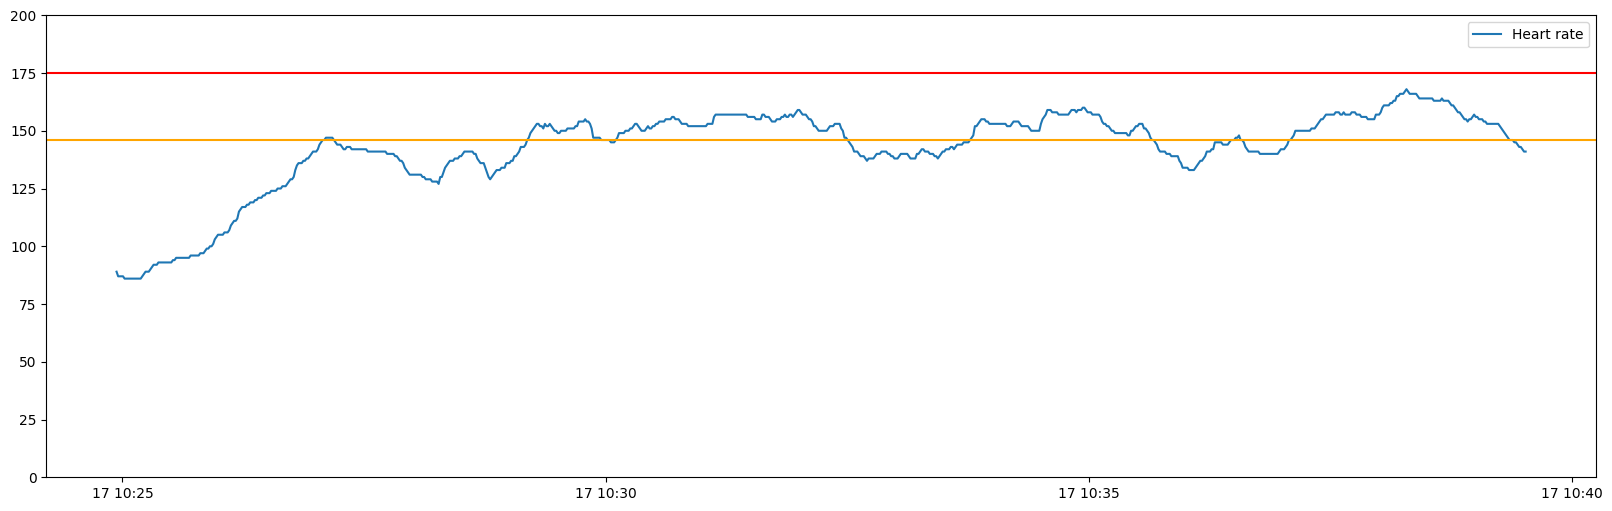

In [5]:
#print time above tresholds as percentage
print("Time above aerobic treshold: ", timeAboveAerk, "%")
print("Time above anaerobic treshold: ", timeAboveAnak, "%")

#Print results
print("Average heart rate:", round(average_heart_rate))
print("Session max heart rate:", max(heartRates))

#Plot heart rate for session
#Add horizontal lines to represent aerobic and anaerobic tresholds

plt.figure(figsize=(20, 6))
plt.plot(times, heartRates, label='Heart rate')
plt.ylim(0,200)
plt.axhline(aerk, color='orange')
plt.axhline(anak, color='red')
plt.legend()
plt.show()


